### Import de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ejemplo de Kmeans en la documentacion de Sklearn

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
#parametros para Kmeans : el numero de clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

### Ejemplo 2

### Import del data

In [5]:
df = pd.read_csv("datasets/Mall_Customers.csv" , index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
##renombrar las columnas del csv
df.rename(columns={'Annual Income (k$)' : 'Income' , 'Spending Score (1-100)':'Spending_score'}, inplace=True)
df.head()

,Gender,Age,Income,Spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Descripcion de las estadisticas 

In [7]:
df.describe()

,Age,Income,Spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


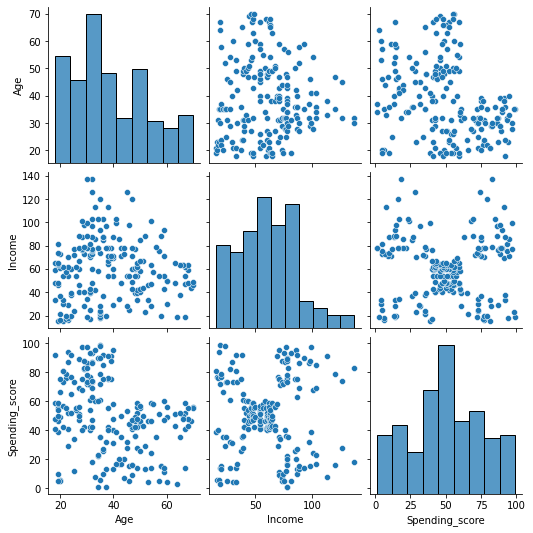

In [8]:
#los datos que queremos utilizar son edad , sueldo y su puntuacion de compras
sns.pairplot(df[['Age','Income','Spending_score']])

### kmeans con 5 clusters

In [9]:
import sklearn.cluster as cluster

In [11]:
#usamos 2 variables
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(df[['Spending_score','Income']])

In [12]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

### adjuntar clusters a los datos originales


In [13]:
df['Clusters'] = kmeans.labels_

In [14]:
df.head()

,Gender,Age,Income,Spending_score,Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,4
3,Female,20,16,6,3
4,Female,23,16,77,4
5,Female,31,17,40,3


In [19]:
df['Clusters'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: Clusters, dtype: int64

### graficar los datos con clusters

<AxesSubplot:xlabel='Spending_score', ylabel='Income'>

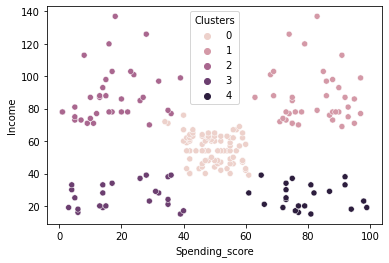

In [20]:
sns.scatterplot(x="Spending_score" , y = "Income", hue= 'Clusters', data=df)

### Ejemplo 3